# Project Three Notebook Example

For your final notebook, feel free to duplicate this notebook and edit as needed. 


## Load Some Stuff

This is where we load libraires and the like so we can do what we need. If you get an error saying a module is not loaded, open a new terminal/cmd line and try running: `pip install [module name]`. 

In [47]:
import os
try:
    inputFunc = raw_input
except NameError:
    inputFunc = input

import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
import numpy as np
 
import seaborn as sns
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from patsy import dmatrices

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import random



# Custom functions

def evaluate(pred, labels_test):
    acc = accuracy_score(pred, labels_test)
    print ("Accuracey: %s"%acc)
    tn, fp, fn, tp = confusion_matrix(labels_test, pred).ravel()

    recall = tp / (tp + fp)
    percision = tp / (tp + fn)
    f1 = (2 / ((1/recall)+(1/percision)))

    print ("")
    print ("True Negatives: %s"%tn)
    print ("False Positives: %s"%fp)
    print ("False Negatives: %s"%fn)
    print ("True Positives: %s"%tp)
    print ("Recall: %s"%recall)
    print ("Precision: %s"%percision)
    print ("F1 Score: %s"%f1)

def plot_bound(Z_val,data,col1,col2,binary):
    # Z-val equals "Yes" value. E.g., "Y" or "1". 
    # data equals df
    # col1 and col2 defines which colums to use from data
    # Plot binary decision boundary. 
    # For this, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    
    x_min = float(data.iloc[:,[col1]].min())-float(data.iloc[:,[col1]].min())*0.10 
    x_max = float(data.iloc[:,[col1]].max()+float(data.iloc[:,[col1]].min())*0.10)
    y_min = 0.0; 
    y_max = float(training.iloc[:,[col2]].max())+float(training.iloc[:,[col2]].max())*0.10
    h_x = (x_max-x_min)/100  # step size in the mesh
    h_y = (y_max-y_min)/100  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h_x), np.arange(y_min, y_max, h_y))
    if binary == 1:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   
        Z = np.where(Z=="Y",1,0)
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.pcolormesh(xx, yy, Z)
    plt.show()

## Data Cleaning

Here we load the data we collected and get it all ready to feed to our statistical model(s). That is, we are trying to make a table with one **target** column and one or more **features**. Here I'm loading happiness.csv from: https://data.somervillema.gov/Happiness/Somerville-Happiness-Survey-responses-2011-2013-20/w898-3dfm Note: you can find information on the data elements at this link. 


In [48]:
# Load and peek at your data. Change the file name as needed. 
raw_data_df = pd.read_csv('Daisy Debt.csv', parse_dates=[0]) 
raw_data_df.head()

,Timestamp,Username,Client name?,Is the Client currently married?,Was the Client married at the the time the debt occurred?,Does the Client have any dependents?,What is the Zip Code for the client?,How old is the client?,How much does the client make annually before taxes?,Where does the income for the Client primarily come from?,...,Has the Client filed for bankruptcy within the past 7 years?,How much is the debt?,What agency is claiming the debt?,"What is the debt for (credit cards, medical expenses, etc...)?",How old is the debt? (Number of years),Is the debt secured or unsecured,"How much, if any, has the Client paid on the debt?",Is the client able to pay a lump sum or are they looking to make payments?,Are there any co-signors for the debt?,Decrease_debt_Y_N
0,2017-12-19 07:04:39,mtm2482@aol.com,NaN,Yes,Yes,Yes,78728,24,1000,Earned income,...,No,50,ABC,Credit Cards,10,Unsecured,0,Payments,No,NaN
1,2017-12-19 07:05:48,mtm2482@aol.com,NaN,Yes,No,Yes,78728,30,10000,Work,...,No,300,XYZ,Credit Cards,10,Unsecured,0,Payments,No,NaN


In [49]:
# You can remove unwanted colums like so

raw_data_df = raw_data_df.drop([
                                            'Username',
                                            'Client name?',
                                            'Timestamp'
                                           ], 1)
raw_data_df.head()

,Is the Client currently married?,Was the Client married at the the time the debt occurred?,Does the Client have any dependents?,What is the Zip Code for the client?,How old is the client?,How much does the client make annually before taxes?,Where does the income for the Client primarily come from?,What is the average total expenses per month for the client?,Has the Client filed for bankruptcy within the past 7 years?,How much is the debt?,What agency is claiming the debt?,"What is the debt for (credit cards, medical expenses, etc...)?",How old is the debt? (Number of years),Is the debt secured or unsecured,"How much, if any, has the Client paid on the debt?",Is the client able to pay a lump sum or are they looking to make payments?,Are there any co-signors for the debt?,Decrease_debt_Y_N
0,Yes,Yes,Yes,78728,24,1000,Earned income,100,No,50,ABC,Credit Cards,10,Unsecured,0,Payments,No,NaN
1,Yes,No,Yes,78728,30,10000,Work,15,No,300,XYZ,Credit Cards,10,Unsecured,0,Payments,No,NaN


In [50]:
# You can rename columns like so.
raw_data_df = raw_data_df.rename(columns={
                                                        'Is the Client currently married?': 'Married', 
                                                        'Was the Client married at the the time the debt occurred?': 'Married during debt',
                                                        'Does the Client have any dependents?': 'Dependents',
                                                        'How old is the client?': 'Age',
                                                        'How much does the client make annually before taxes?': 'Income',
                                                        'What is the average total expenses per month for the client?': 'Expenses',
                                                        'Has the Client filed for bankruptcy within the past 7 years?': 'Bankruptcy',
                                                        'How much is the debt?': 'Debt',
                                                        'What agency is claiming the debt?': 'Agency',
                                                        'What is the debt for (credit cards, medical expenses, etc...)?': 'Debt source',
                                                        'How old is the debt? (Number of years)': 'Debt Age',    
                                                        'Is the debt secured or unsecured': 'Secured',
                                                        'How much, if any, has the Client paid on the debt?': 'Paid' ,
                                                        'Is the client able to pay a lump sum or are they looking to make payments?': 'Payment',
                                                        'Are there any co-signors for the debt?': 'cosignors',
                                                        'What is the Zip Code for the client?': 'Zip Code', 
                                                        'Where does the income for the Client primarily come from?': 'Source',
                                                     })
raw_data_df.head()

,Married,Married during debt,Dependents,Zip Code,Age,Income,Source,Expenses,Bankruptcy,Debt,Agency,Debt source,Debt Age,Secured,"How much, if any, has the Client paid on the debt?",Payment,cosignors,Decrease_debt_Y_N
0,Yes,Yes,Yes,78728,24,1000,Earned income,100,No,50,ABC,Credit Cards,10,Unsecured,0,Payments,No,NaN
1,Yes,No,Yes,78728,30,10000,Work,15,No,300,XYZ,Credit Cards,10,Unsecured,0,Payments,No,NaN


In [54]:
raw_data_df.loc[raw_data_df['Married during debt'] == 'Yes', 'Married during debt'] = 1
raw_data_df.loc[raw_data_df['Married during debt'] == 'No', 'Married during debt'] = 0
raw_data_df.loc[raw_data_df['Dependents'] == 'Yes', 'Dependents'] = 1
raw_data_df.loc[raw_data_df['Dependents'] == 'No', 'Dependents'] = 0
raw_data_df.loc[raw_data_df['Bankruptcy'] == 'Yes', 'Bankruptcy'] = 1
raw_data_df.loc[raw_data_df['Bankruptcy'] == 'No', 'Bankruptcy'] = 0
raw_data_df.loc[raw_data_df['Secured'] == 'Secured', 'Secured'] = 1
raw_data_df.loc[raw_data_df['Secured'] == 'Unsecured', 'Secured'] = 0
raw_data_df.loc[raw_data_df['Payment'] == 'Payments', 'Payment'] = 1
raw_data_df.loc[raw_data_df['Payment'] == 'Lump Sum', 'Payment'] = 0
raw_data_df.loc[raw_data_df['cosignors'] == 'Yes', 'cosignors'] = 1
raw_data_df.loc[raw_data_df['cosignors'] == 'No', 'cosignors'] = 0
raw_data_df.loc[raw_data_df['Married'] == 'Yes', 'Married'] = 1
raw_data_df.loc[raw_data_df['Married'] == 'No', 'Married'] = 0
raw_data_df.head()


,Married,Married during debt,Dependents,Zip Code,Age,Income,Source,Expenses,Bankruptcy,Debt,Agency,Debt source,Debt Age,Secured,"How much, if any, has the Client paid on the debt?",Payment,cosignors,Decrease_debt_Y_N
0,1,1,1,78728,24,1000,Earned income,100,0,50,ABC,Credit Cards,10,0,0,1,0,NaN
1,1,0,1,78728,30,10000,Work,15,0,300,XYZ,Credit Cards,10,0,0,1,0,NaN


In [56]:
# And then you can customize these new coulmns using the same method as above. 
raw_data_df.loc[raw_data_df['Income'] >= 1, 'Decrease_debt_Y_N'] = "Y"
raw_data_df.head()

,Married,Married during debt,Dependents,Zip Code,Age,Income,Source,Expenses,Bankruptcy,Debt,Agency,Debt source,Debt Age,Secured,"How much, if any, has the Client paid on the debt?",Payment,cosignors,Decrease_debt_Y_N
0,1,1,1,78728,24,1000,Earned income,100,0,50,ABC,Credit Cards,10,0,0,1,0,Y
1,1,0,1,78728,30,10000,Work,15,0,300,XYZ,Credit Cards,10,0,0,1,0,Y


In [58]:
# I'm now going to make a set of tables to be used in training some models
# The first set will be for linear regressions where the traget is numeric.
# Happiness
settlement_lin_df = raw_data_df[[
                               'Income', 
                               'Age', 
                               'Debt'
                               ]].copy()
settlement_lin_df.head()

,Income,Age,Debt
0,1000,24,50
1,10000,30,300


In [59]:
# The second set will be for classifiers where the target is a class.
# Happiness
settlement_class_df = raw_data_df[[
                               'Decrease_debt_Y_N', 
                               'Debt', 
                               'Income'
                               ]].copy()
settlement_class_df.head()

,Decrease_debt_Y_N,Debt,Income
0,Y,50,1000
1,Y,300,10000


## Taining and Validation

Above I created four datasets worth exploring: 
- **`happy_lin_df`**. The data needed to access *happiness* along a continuous variable.
- **`sat_lin_df`**. The data needed to access *satisfaction* along a continuous variable.
- **`happy_class_df`**. The data needed to access *happiness* as a categorical variable.
- **`sat_class_df`**. The data needed to access *satisfaction* as a categorical variable.

Let's take them each in turn. 

## settlement_lin_df



In [61]:
data = settlement_lin_df

data = data[data["Income"]>=1]

holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

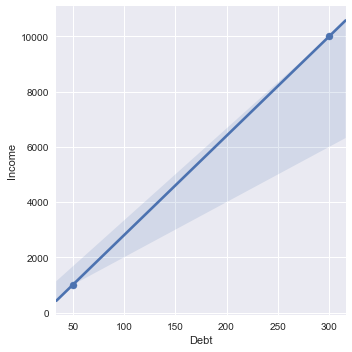

In [62]:
sns.lmplot(x="Debt", y="Income", data=training, x_estimator=np.mean, order=1)

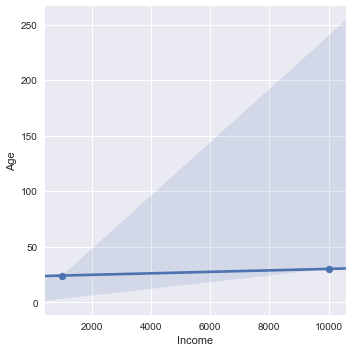

In [63]:
sns.lmplot(x="Income", y="Age", data=training, x_estimator=np.mean, order=1)

In [23]:
model = ols("happy ~ age + income", training).fit()
#model = ols("happy ~ age + income + np.power(age, 2) + np.power(income, 2)", training).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  happy   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     37.48
Date:                Tue, 28 Nov 2017   Prob (F-statistic):           6.82e-17
Time:                        18:16:44   Log-Likelihood:                -11250.
No. Observations:                5483   AIC:                         2.251e+04
Df Residuals:                    5480   BIC:                         2.253e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2573      0.105     68.890      0.000       7.051       7.464
age           -0.0044      0.002     -2.226      0.026      -0.008      -0.001
income      6.338e-06   7.98e-07      7.945      0.000    4.77e-06     7.9e-06
==============================================================================
Omnibus:                      769.269   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1209.029
Skew:                          -0.979   Prob(JB):                    2.90e-263
Kurtosis:                       4.208   Cond. No.                     3.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# Rerun with SciKitLearn because it's easy to check accuracy
features_train = training.drop("happy", axis=1).as_matrix(columns=None)
labels_train = training["happy"].as_matrix(columns=None)

features_test = holdout.drop("happy", axis=1).as_matrix(columns=None)
labels_test = holdout["happy"].as_matrix(columns=None)

lm = linear_model.LinearRegression()
clf = lm.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = metrics.r2_score(labels_test, pred)
print("R squared:",lm.score(features_train,labels_train))
print("Accuracy:",accuracy)

R squared: 0.0134935841022
Accuracy: 0.0132611014339


## happy_class_df

Percentage of Ys: 0.9210662973861866



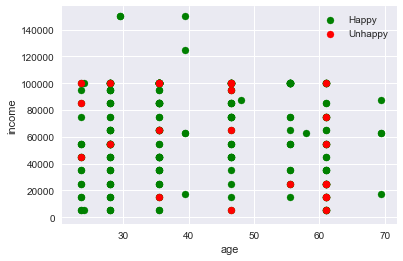

In [30]:
data = happy_class_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

# Define the target (y) and feature(s) (X)
features_train = training.drop("happy_Y_N", axis=1).as_matrix(columns=None)
labels_train = training["happy_Y_N"].as_matrix(columns=None)

features_test = holdout.drop("happy_Y_N", axis=1).as_matrix(columns=None)
labels_test = holdout["happy_Y_N"].as_matrix(columns=None)

# What percentage of the time is target Y?
print("Percentage of Ys: %s\n"%(len(data[data["happy_Y_N"]=="Y"])/len(data)))

#### initial visualization
feature_1_no = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]=="N"]
feature_2_no = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]=="N"]
feature_1_yes = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]=="Y"]
feature_2_yes = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]=="Y"]
plt.scatter(feature_1_yes, feature_2_yes, color = "g", label="Happy")
plt.scatter(feature_1_no, feature_2_no, color = "r", label="Unhappy")
plt.legend()
plt.xlabel("age")
plt.ylabel("income")
plt.show()


Logistic Regression
Accuracey: 0.920415224913

True Negatives: 0
False Positives: 23
False Negatives: 0
True Positives: 266
Recall: 0.920415224913
Precision: 1.0
F1 Score: 0.958558558559


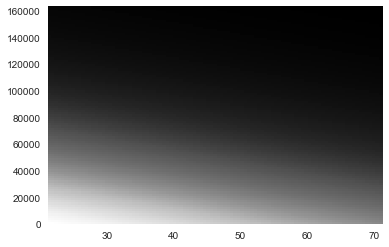


Y
0.995900268082


Decision Tree
Accuracey: 0.916955017301

True Negatives: 0
False Positives: 23
False Negatives: 1
True Positives: 265
Recall: 0.920138888889
Precision: 0.996240601504
F1 Score: 0.956678700361


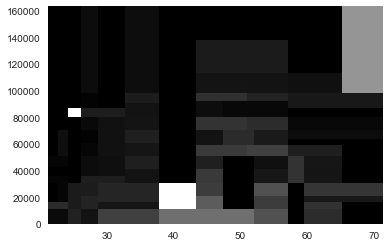

Random Forest
Accuracey: 0.916955017301

True Negatives: 0
False Positives: 23
False Negatives: 1
True Positives: 265
Recall: 0.920138888889
Precision: 0.996240601504
F1 Score: 0.956678700361


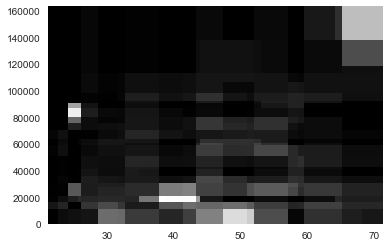

SVM
Accuracey: 0.916955017301

True Negatives: 0
False Positives: 23
False Negatives: 1
True Positives: 265
Recall: 0.920138888889
Precision: 0.996240601504
F1 Score: 0.956678700361


In [31]:
# Logistic Regression
model = LogisticRegression(fit_intercept = False, C = 1e9)
clf = model.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Logistic Regression")
evaluate(pred, labels_test)  
plot_bound("Y",holdout,1,2,0)


# Test some spot
x_test = 70
y_test = 160000
print("")
print(clf.predict([[x_test,y_test]])[0])
print(clf.predict_proba([[x_test,y_test]])[0][1])
print("")

from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=40)
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("\nDecision Tree")
evaluate(pred, labels_test)
plot_bound("Y",holdout,1,2,0)



from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Random Forest")
evaluate(pred, labels_test)  
plot_bound("Y",holdout,1,2,0)


from sklearn.svm import SVC
clf = SVC(kernel="rbf",probability=True)
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("SVM")
evaluate(pred, labels_test)  
#plot_bound("Y",holdout,1,2,0) # plot doesn't work with SVM

## sat_class_df

Percentage of Ys: 0.9324909122381859



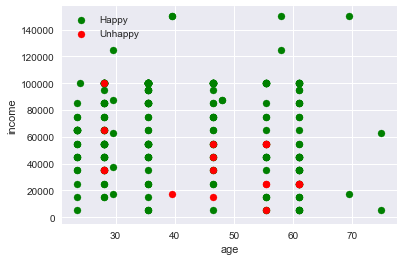

In [32]:
data = sat_class_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

# Define the target (y) and feature(s) (X)
features_train = training.drop("satisfied_Y_N", axis=1).as_matrix(columns=None)
labels_train = training["satisfied_Y_N"].as_matrix(columns=None)

features_test = holdout.drop("satisfied_Y_N", axis=1).as_matrix(columns=None)
labels_test = holdout["satisfied_Y_N"].as_matrix(columns=None)

# What percentage of the time is target Y?
print("Percentage of Ys: %s\n"%(len(data[data["satisfied_Y_N"]=="Y"])/len(data)))

#### initial visualization
feature_1_no = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]=="N"]
feature_2_no = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]=="N"]
feature_1_yes = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]=="Y"]
feature_2_yes = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]=="Y"]
plt.scatter(feature_1_yes, feature_2_yes, color = "g", label="Happy")
plt.scatter(feature_1_no, feature_2_no, color = "r", label="Unhappy")
plt.legend()
plt.xlabel("age")
plt.ylabel("income")
plt.show()

Logistic Regression
Accuracey: 0.937716262976

True Negatives: 0
False Positives: 18
False Negatives: 0
True Positives: 271
Recall: 0.937716262976
Precision: 1.0
F1 Score: 0.967857142857


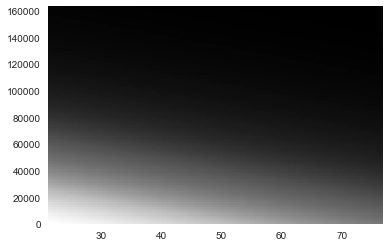


Y
0.997643889301


Decision Tree
Accuracey: 0.937716262976

True Negatives: 0
False Positives: 18
False Negatives: 0
True Positives: 271
Recall: 0.937716262976
Precision: 1.0
F1 Score: 0.967857142857


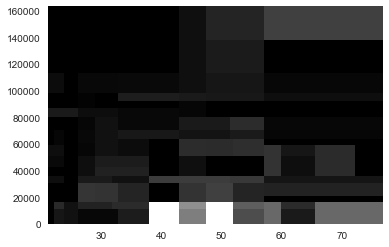

Random Forest
Accuracey: 0.937716262976

True Negatives: 0
False Positives: 18
False Negatives: 0
True Positives: 271
Recall: 0.937716262976
Precision: 1.0
F1 Score: 0.967857142857


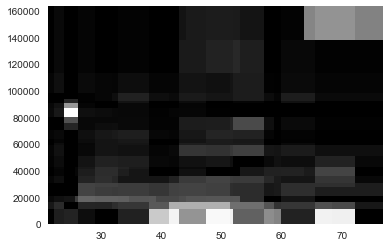

SVM
Accuracey: 0.937716262976

True Negatives: 0
False Positives: 18
False Negatives: 0
True Positives: 271
Recall: 0.937716262976
Precision: 1.0
F1 Score: 0.967857142857


In [33]:
# Logistic Regression
model = LogisticRegression(fit_intercept = False, C = 1e9)
clf = model.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Logistic Regression")
evaluate(pred, labels_test)  
plot_bound("Y",holdout,1,2,0)


# Test some spot
x_test = 70
y_test = 160000
print("")
print(clf.predict([[x_test,y_test]])[0])
print(clf.predict_proba([[x_test,y_test]])[0][1])
print("")

from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=40)
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("\nDecision Tree")
evaluate(pred, labels_test)
plot_bound("Y",holdout,1,2,0)



from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Random Forest")
evaluate(pred, labels_test)  
plot_bound("Y",holdout,1,2,0)


from sklearn.svm import SVC
clf = SVC(kernel="rbf",probability=True)
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("SVM")
evaluate(pred, labels_test)  
#plot_bound("Y",holdout,1,2,0) # plot doesn't work with SVM